# 2. Importing libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Turn project folder path into a string

path = r'/Users/giorjeanmutuc/AirBNB NYC'

In [5]:
# Import data

df_clean = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'AB_NYC_clean.csv'), index_col = 0)

# 3. Data Cleaning

In [6]:
df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Rename columns 

df_clean.rename(columns = {'minimum_nights' : 'min_nights', 'number_of_reviews' : 'total_reviews','reviews_per_month' : 'reviews_per_mon','calculated_host_listings_count' : 'host_listings_count'}, inplace = True)

In [8]:
df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,min_nights,total_reviews,last_review,reviews_per_mon,host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Missing values

In [12]:
# Check for missing values

df_clean.isnull().sum()

# Missing dates (NAN) under last_reviews

id                         0
host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
min_nights                 0
total_reviews              0
last_review            10052
reviews_per_mon            0
host_listings_count        0
availability_365           0
dtype: int64

#### Duplicates check

In [13]:
# Check duplicates

dups = df_clean.duplicated()

In [14]:
dups.shape # No duplicates

(48895,)

In [ ]:
#### Extreme values check 

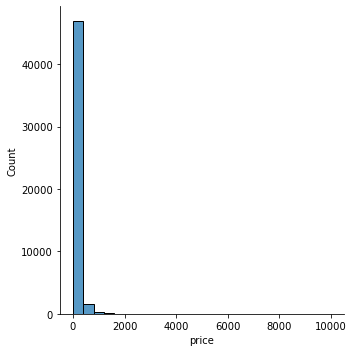

In [16]:
# Shows extreme values for price

sns.displot(df_clean['price'], bins=25) 

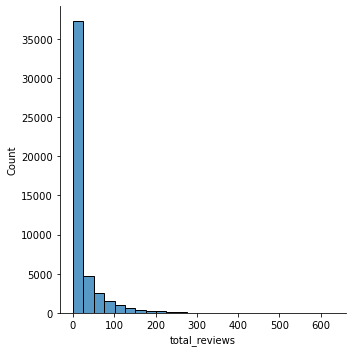

In [17]:
# Shows extreme values for price

sns.displot(df_clean['total_reviews'], bins=25) 

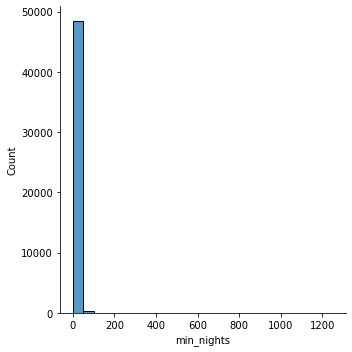

In [18]:
# Shows extreme values for price

sns.displot(df_clean['min_nights'], bins=25) 

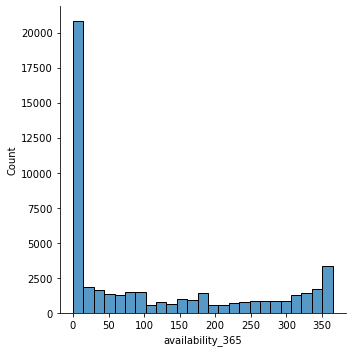

In [19]:
# Shows extreme values for price

sns.displot(df_clean['availability_365'], bins=25) 

# 4. Data prep for Regression analysis

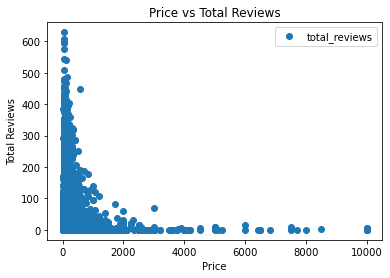

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'price', y='total_reviews',style='o')
plt.title('Price vs Total Reviews')  
plt.xlabel('Price')  
plt.ylabel('Total Reviews')  
plt.show()

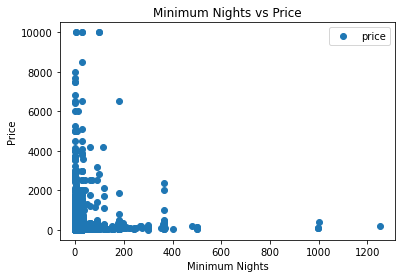

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'min_nights', y='price',style='o')
plt.title('Minimum Nights vs Price')  
plt.xlabel('Minimum Nights')  
plt.ylabel('Price')  
plt.show()

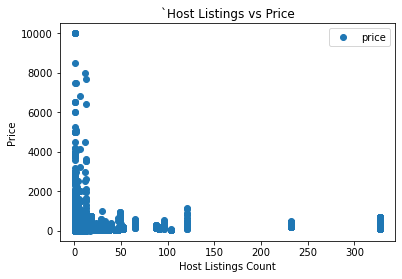

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'host_listings_count', y='price',style='o')
plt.title('`Host Listings vs Price')  
plt.xlabel('Host Listings Count')  
plt.ylabel('Price')  
plt.show()

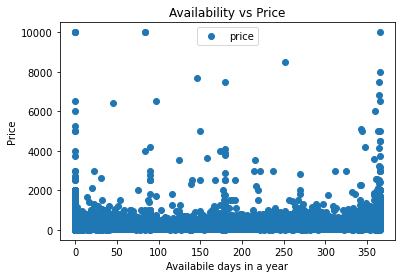

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'availability_365', y='price',style='o')
plt.title('Availability vs Price')  
plt.xlabel('Availabile days in a year')  
plt.ylabel('Price')  
plt.show()

#### Based on the scattered plot charts, it would be good to test the relationship of total_reviews and price.

# 5. State hypothesis

### The lower the price the more reviews a property gets. 

# 6. Reshape variables

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['price'].values.reshape(-1,1)
y = df_clean['total_reviews'].values.reshape(-1,1)

In [31]:
X

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]])

In [33]:
y

array([[ 9],
       [45],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]])

# 7. Split data into training set and test set

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Run linear regression on data set

In [34]:
# Create a regression object.

regression = LinearRegression() 

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

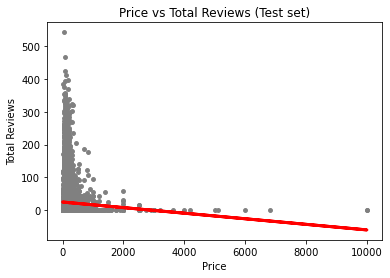

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Total Reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Total Reviews')
plot_test.show()

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00851049]]
Mean squared error:  1860.2148440330943
R2 score:  0.0022161963441751364


In [43]:
y_predicted

array([[22.95473351],
       [19.34628732],
       [22.31644703],
       ...,
       [23.17600615],
       [23.59301998],
       [23.25260053]])

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,22.954734
1,5,19.346287
2,5,22.316447
3,13,24.648320
4,4,23.805782
5,1,24.452579
6,156,24.018544
7,14,23.380258
8,0,24.146202
9,118,24.273859


# 9.Plot that shows the regression line on the test set

#### Compare how regression fits traning set

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00851049]]
Mean squared error:  2031.689790421126
R2 score:  0.002120940611156974


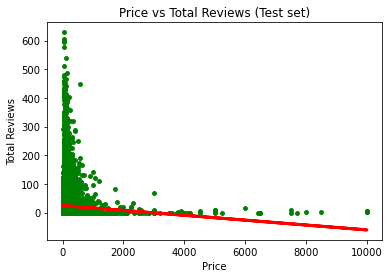

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Total Reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Total Reviews')
plot_test.show()

# 10. Write your own interpretation of how well the line appears to fit the data.

#### On the surface, it appears like the line is fit to the data. But a closer inspection of the summary statistics show that it's not a fit at all. 

# 11. Check the model performance statistics—MSE and R2.

#### MSE for both test and training models are very high (1860.21 and 2031.69 respectively) which indicates that the model is a bad fit.

#### R2 score for both test and training models are closer to zero (.002 for both) which again indicates a poor fit.

# 12. Compare the predicted y values with the actual y values in a dataframe.

#### The predicted y values and the actual y values are not even close to each other. The difference in the values are massive. 

# 13. Reflections

#### The model proved that price and total_reviews are possibly unrelated to each other or at least using just those variables. It's still possible that they are somehow related but there could be other variables or factors that affect to draw the relationship between the two. The fact that the predicted values show absolutely no commonality proves thhat the model is a bad fit. This also disproves the hypothesis that the lower the price, the higher the number of reviews. 